## Данный документ создан с целью сбора и анализа данных по продаже техники при помощи интернет магазина. Статистика и результативность посещаемости сайта приведено.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'E-Commerce-Dataset.csv'
df = pd.read_csv(path)
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


Расшифровка данных
CustomerID - Уникальный идентификатор клиента
- Churn - Флаг оттока
- Tenure - Срок пребывания клиента в организации
- PreferredLoginDevice - Предпочтительный способ входа в систему для клиента
- CityTier - Городской уровень
- WarehouseToHome - Расстояние между складом и домом покупателя
- PreferredPaymentMode - Предпочтительный способ оплаты клиента
- Gender - Пол клиента
- HourSpendOnApp - Количество часов, потраченных на мобильное приложение или
- NumberOfDeviceRegistered - Общее количество обманов зарегистрировано по части
- PreferedOrderCat - Предпочтительная категория заказа клиента за последний месяц
- SatisfactionScore - Удовлетворительная оценка клиента по обслуживанию
- MaritalStatus - Семейное положение клиента
- NumberOfAddress - Общее количество добавленных товаров для конкретного клиента
- Complain - Была ли подана жалоба в прошлом месяце
- OrderAmountHikeFromlastYear - Percentage increases in order from last year
- CouponUsed - Общее количество купонов, использованных за последний месяц
- OrderCount - Общее количество заказов, размещенных за последний
- DaySinceLastOrder - День с момента последнего заказа клиента
- CashbackAmount - Средний кэшбэк за последний месяц

In [12]:
df.shape

(5630, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [6]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [ ]:
Посчитаем сколько потребителей после получения купонов сделали заказ.

In [19]:
df['CouponUsed'] - df['OrderCount']

0       0.0
1      -1.0
2      -1.0
3      -1.0
4       0.0
       ... 
5625   -1.0
5626   -1.0
5627   -1.0
5628    0.0
5629    0.0
Length: 5630, dtype: float64

In [7]:
df['Churn'].value_counts()/len(df) * 100

Churn
0    83.161634
1    16.838366
Name: count, dtype: float64

Можно также посчитать количество потребителей оставшихся за определенное время.

In [8]:
churn_rate = df['Churn'].value_counts()/len(df) * 100

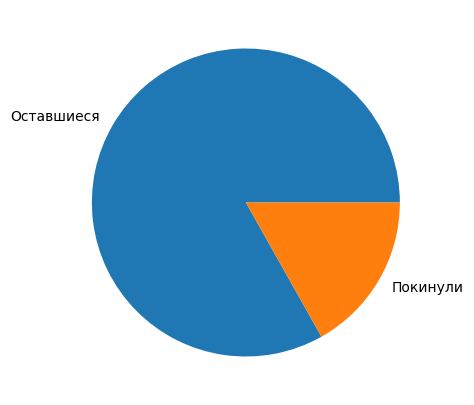

In [13]:
plt.figure(figsize = (5,5))
plt.pie(churn_rate, labels = ['Оставшиеся', 'Покинули'])
plt.show()

In [30]:
df['PreferredPaymentMode'].value_counts()

PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64

Создаем диаграмму видов оплаты. 

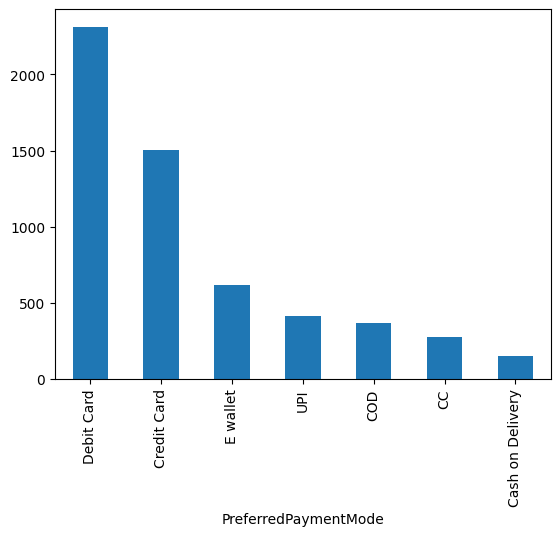

In [31]:
df['PreferredPaymentMode'].value_counts().plot(kind = 'bar')
plt.show()

In [32]:
df['Tenure'].describe().to_frame()

,Tenure
count,5366.000000
mean,10.189899
std,8.557241
min,0.000000
25%,2.000000
50%,9.000000
75%,16.000000
max,61.000000


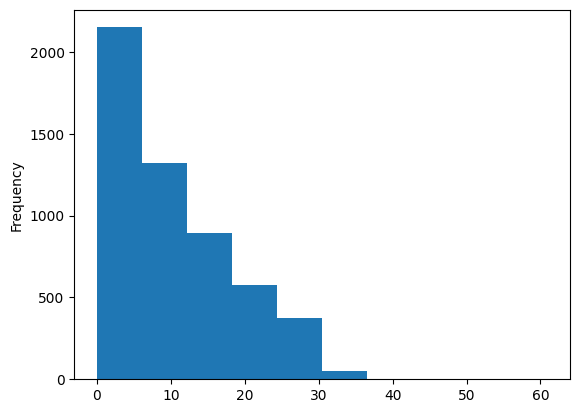

In [35]:
df['Tenure'].plot(kind = 'hist')
plt.show()

In [19]:
df['PreferredLoginDevice'].value_counts()

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64

Рейтинг продаваемых товаров с интернет магазина

<Axes: ylabel='count'>

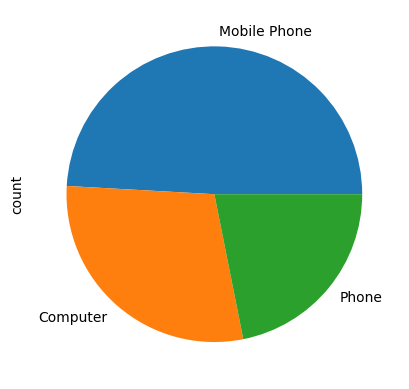

In [20]:
df['PreferredLoginDevice'].value_counts().plot(kind = 'pie')

Статистика гендерных различий среди заказчиков

In [41]:
df['Gender'].value_counts()

Gender
Male      3384
Female    2246
Name: count, dtype: int64

<Axes: xlabel='Gender'>

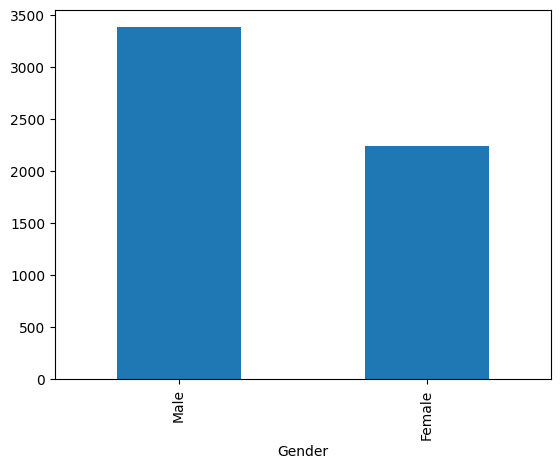

In [43]:
df['Gender'].value_counts().plot(kind = 'bar')

Статистика видов товаров, рейтинг продажи.

In [44]:
df['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64

<Axes: xlabel='PreferedOrderCat'>

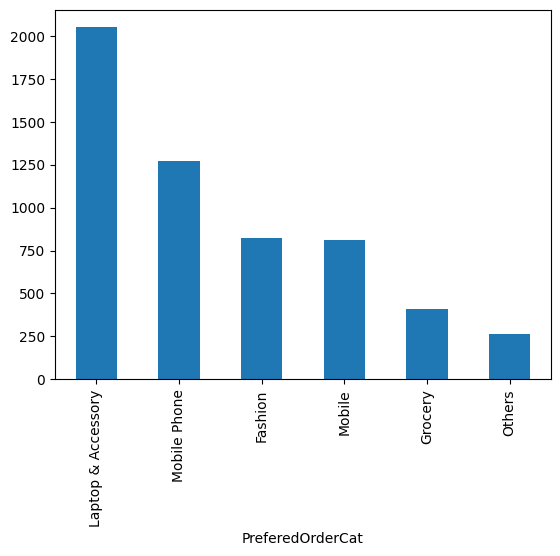

In [49]:
df['PreferedOrderCat'].value_counts().plot(kind = 'bar')

In [50]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64

Статистика семейного положения заказчиков. Выходит семейным заказчикам больше требуется покупать.

<Axes: ylabel='count'>

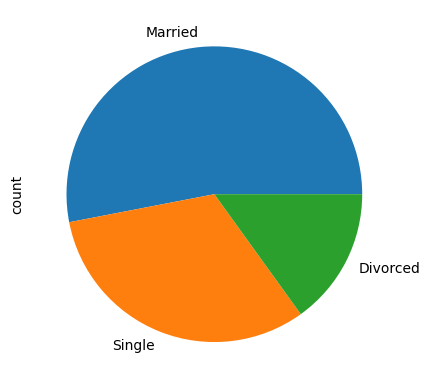

In [57]:
df['MaritalStatus'].value_counts().plot(kind = 'pie')

In [65]:
pivot_table = df.pivot_table(values='SatisfactionScore', index='Gender', aggfunc='mean')

In [66]:
pivot_table

,SatisfactionScore
Gender,
Female,3.126447
Male,3.027187


In [20]:
df1 = df[['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']]
df1.corrwith(df['Churn']).abs().sort_values(ascending=False)

Churn                          1.000000
Tenure                         0.349408
Complain                       0.250188
DaySinceLastOrder              0.160757
CashbackAmount                 0.154161
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.076630
NumberOfAddress                0.043931
OrderCount                     0.028697
CustomerID                     0.019083
HourSpendOnApp                 0.018675
OrderAmountHikeFromlastYear    0.010058
CouponUsed                     0.008264
dtype: float64

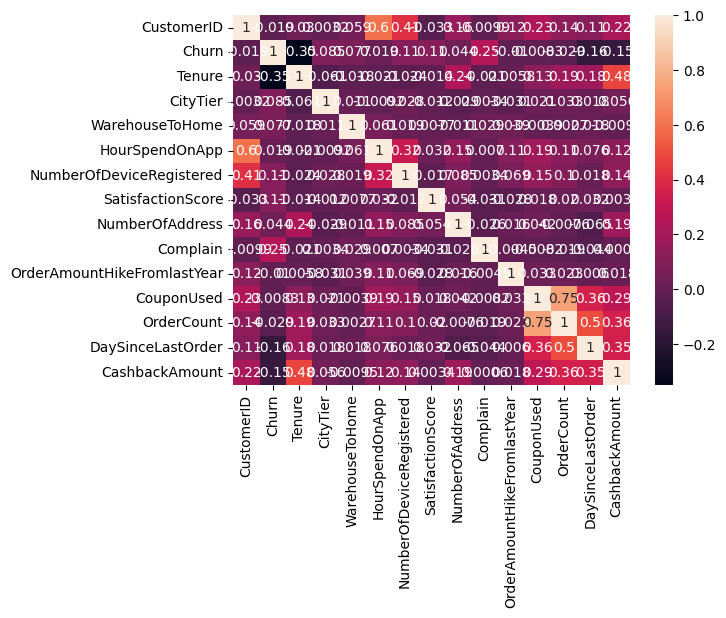

In [44]:
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, annot=True,  cmap='coolwarm') 
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

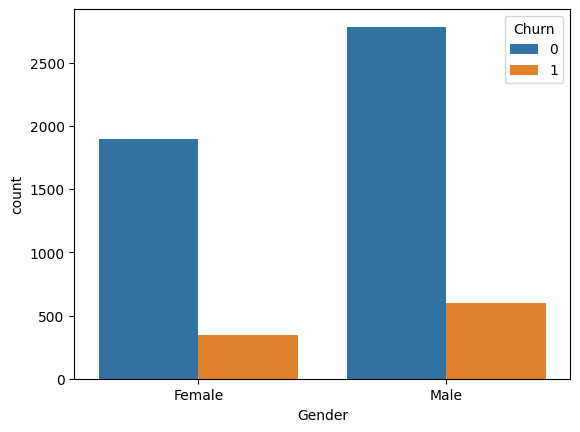

In [21]:
sns.countplot(x='Gender', hue='Churn', data=df)

In [46]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64